## 매일 업데이트되는 환율(2015년~현재)
2015년부터 현재까지 세계 상위 56개 통화의 일일 기록

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

In [4]:
df = pd.read_csv("/home/leejieun/workspace/kaggle-notebooks/datasets/zgrcemta/daily-updated-exchange-rates2015-now/exchanges.csv")

In [5]:
df.head()

,date,ARS,AUD,BHD,BWP,BRL,BND,BGN,CAD,CLP,...,SEK,CHF,TWD,THB,TTD,TRY,AED,GBP,USD,VES
0,2024-03-26,927.917949,1.657072,0.407261,14.851876,5.404370,1.457716,1.95583,1.469979,1067.653126,...,11.455691,0.978231,34.567964,39.362792,7.355843,34.860965,3.977833,0.857455,1.083140,3.930117e+06
1,2024-03-25,927.886127,1.657695,0.407487,14.871068,5.403579,1.458760,1.95583,1.471837,1063.569717,...,11.453752,0.973424,34.512272,39.407103,7.349734,34.844228,3.980039,0.857053,1.083741,3.935179e+06
2,2024-03-25,927.769587,1.657270,0.407440,14.873419,5.400153,1.458473,1.95583,1.471637,1062.188403,...,11.453146,0.973606,34.525648,39.405349,7.357068,34.845013,3.979588,0.857180,1.083618,3.934634e+06
3,2024-03-24,923.672533,1.658885,0.406442,14.752422,5.408039,1.457764,1.95583,1.470852,1062.880340,...,11.426660,0.970361,34.597349,39.314486,7.354545,34.609580,3.969834,0.856737,1.080962,3.916991e+06
4,2024-03-24,923.444019,1.658827,0.406341,14.748769,5.406631,1.457403,1.95583,1.470487,1062.617406,...,11.423830,0.970160,34.588785,39.298678,7.352723,34.600519,3.968851,0.857081,1.080695,3.916021e+06


In [7]:
df.shape

(3605, 54)

In [8]:
df.duplicated().sum()

1

In [9]:
df.isna().sum()

date      0
ARS       0
AUD       0
BHD       0
BWP       0
BRL       0
BND       0
BGN       0
CAD       0
CLP       0
CNY       0
COP       0
HRK     773
CZK       0
DKK       0
HKD       0
HUF       0
ISK       0
INR       0
IDR       0
IRR       0
ILS       0
JPY       0
KZT       0
KRW       0
KWD       0
LYD       0
MYR       0
MUR       0
MXN       0
NPR       0
NZD       0
NOK       0
OMR       0
PKR       0
PHP       0
PLN       0
QAR       0
RON       0
RUB       0
SAR       0
SGD       0
ZAR       0
LKR       0
SEK       0
CHF       0
TWD       0
THB       0
TTD       0
TRY       0
AED       0
GBP       0
USD       0
VES       0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ARS,3605.0,1.444171e+02,2.123862e+02,9.219545,20.393336,66.799489,1.324374e+02,9.299273e+02
AUD,3605.0,1.568198e+00,7.883334e-02,1.369589,1.506895,1.578830,1.627048e+00,1.871997e+00
BHD,3605.0,4.208593e-01,1.968029e-02,0.361859,0.408022,0.419244,4.346750e-01,4.696140e-01
BWP,3605.0,1.277712e+01,1.128785e+00,10.475759,11.934844,12.575383,1.338184e+01,1.501649e+01
BRL,3605.0,4.864580e+00,9.652178e-01,3.164498,4.048673,4.773460,5.490138e+00,6.956614e+00
BND,3605.0,1.525302e+00,6.100939e-02,1.382229,1.470320,1.526839,1.580955e+00,1.652266e+00
BGN,3605.0,1.955297e+00,1.197673e-02,1.701660,1.955830,1.955830,1.955830e+00,1.976451e+00
CAD,3605.0,1.467936e+00,5.713998e-02,1.289418,1.442382,1.469066,1.504887e+00,1.613649e+00
CLP,3605.0,8.382398e+02,9.588128e+01,653.487833,753.232778,851.801120,9.175395e+02,1.075888e+03
CNY,3605.0,7.560344e+00,3.405993e-01,6.568257,7.331319,7.676036,7.818217e+00,8.263799e+00


In [11]:
df.nunique()

date    3314
ARS     3594
AUD     3549
BHD     3464
BWP     3574
BRL     3574
BND     3536
BGN      880
CAD     3534
CLP     3594
CNY     3577
COP     3596
HRK     2782
CZK     3577
DKK     3400
HKD     3572
HUF     3575
ISK     3575
INR     3577
IDR     3580
IRR     3576
ILS     3565
JPY     3579
KZT     3575
KRW     3580
KWD     3455
LYD     3559
MYR     3571
MUR     3577
MXN     3577
NPR     3575
NZD     3555
NOK     3573
OMR     3469
PKR     3577
PHP     3576
PLN     3563
QAR     3567
RON     3549
RUB     3577
SAR     3565
SGD     3536
ZAR     3573
LKR     3575
SEK     3575
CHF     3527
TWD     3577
THB     3576
TTD     3569
TRY     3576
AED     3567
GBP     3501
USD     3530
VES     3575
dtype: int64

In [12]:
df = df[["date", "BRL"]]
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

In [13]:
df.sort_index(inplace=True)
df.head()

,BRL
date,
2015-03-01,3.183447
2015-03-02,3.219807
2015-03-03,3.251596
2015-03-04,3.297677
2015-03-05,3.297350


<Axes: title={'center': 'USD x BRL Performance'}, xlabel='date'>

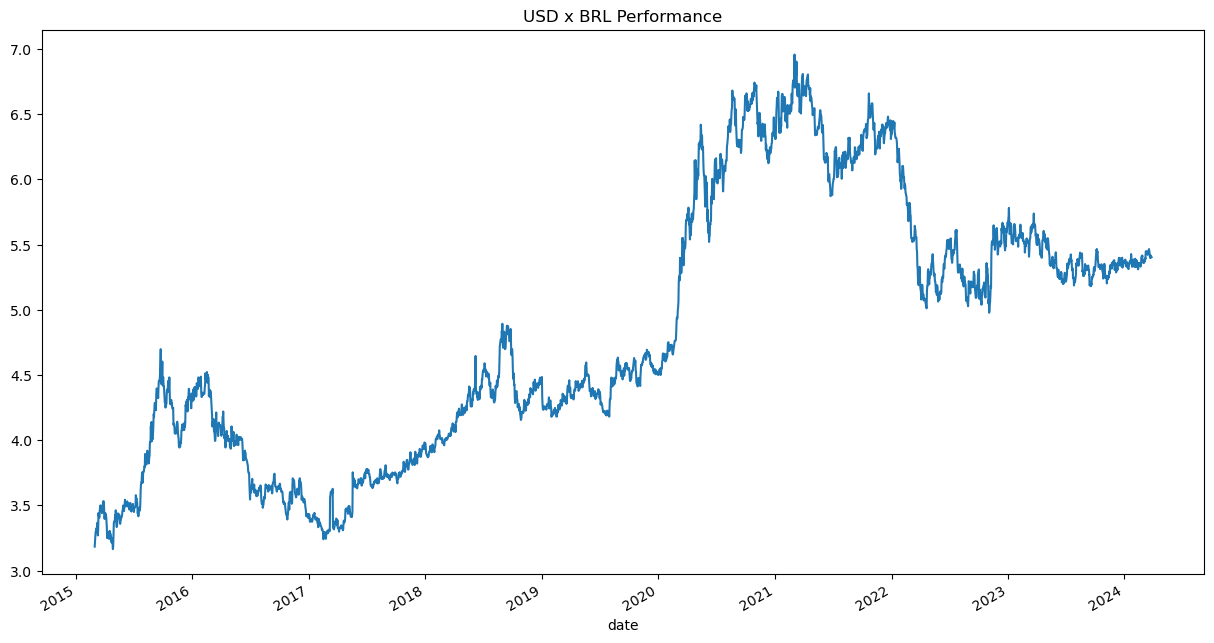

In [14]:
df["BRL"].plot(figsize=(15,8), title="USD x BRL Performance")

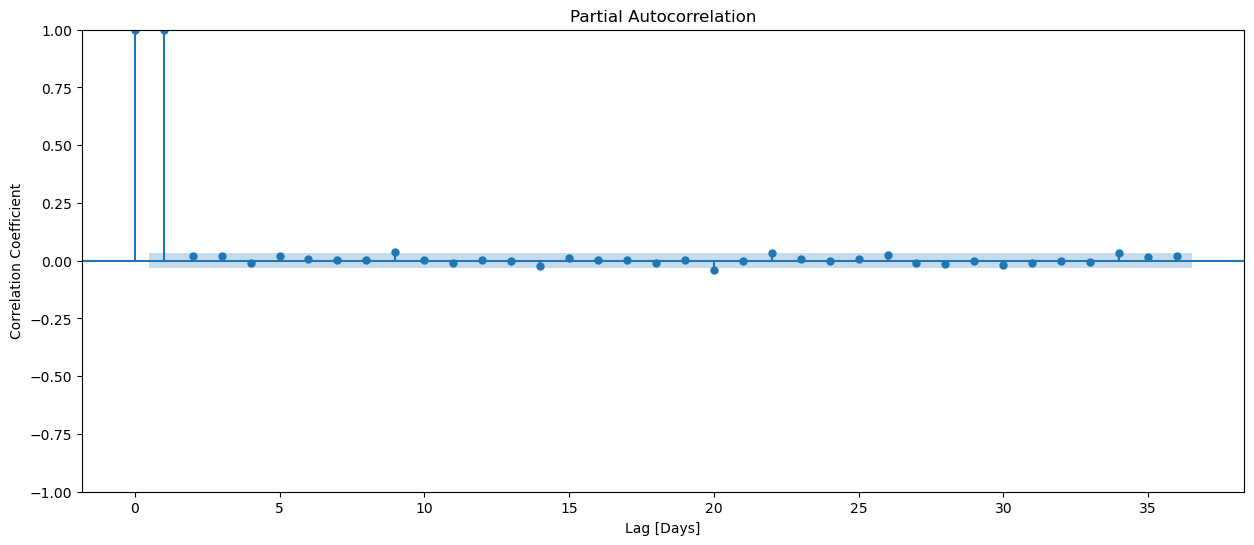

In [15]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(df["BRL"], ax=ax)
plt.xlabel("Lag [Days]")
plt.ylabel("Correlation Coefficient")
plt.show()